In [49]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
from keras.applications.vgg16 import VGG16
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

In [27]:
# Rutas de las carpetas de entrenamiento, validación y test
training_path = 'training'
test_path = 'test'
validation_path = 'validation'

In [28]:
# Aumentación de datos con rescalamiento, rotación, traslación, zoom y giro horizontal
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [29]:
# Generador de datos a utilizar a partir del directorio de testing
test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse'
)

# Generador de datos a utilizar a partir del directorio de entrenamiento
train_generator = datagen.flow_from_directory(
    training_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse'
)

val_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

Found 2059 images belonging to 6 classes.
Found 12065 images belonging to 6 classes.
Found 2910 images belonging to 6 classes.


(32, 150, 150, 3)
[4. 2. 0. 5. 5. 1. 3. 0. 0. 0. 0. 0. 0. 3. 4. 5. 4. 2. 2. 3. 5. 5. 4. 2.
 1. 3. 2. 5. 4. 4. 2. 4.]


<Figure size 640x480 with 0 Axes>

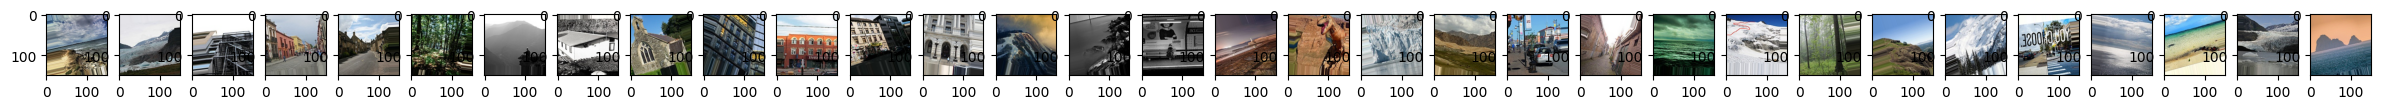

In [30]:
images , labels = train_generator[0]

print(images.shape)
print(labels)

plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

In [31]:
# Cargar el modelo VGG16 pre-entrenado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False

# Crear el modelo
model = models.Sequential()
model.add(base_model)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

In [32]:
# Compilar el modelo
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [33]:
# Entrenar el modelo 
history = model.fit(train_generator, epochs=10, validation_data=val_generator, validation_steps=5)

Epoch 1/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 317s 831ms/step - accuracy: 0.6173 - loss: 1.1056 - val_accuracy: 0.8625 - val_loss: 0.3659
Epoch 2/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 315s 831ms/step - accuracy: 0.8066 - loss: 0.5337 - val_accuracy: 0.8687 - val_loss: 0.3728
Epoch 3/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 319s 842ms/step - accuracy: 0.8283 - loss: 0.4743 - val_accuracy: 0.9625 - val_loss: 0.2262
Epoch 4/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 314s 828ms/step - accuracy: 0.8409 - loss: 0.4325 - val_accuracy: 0.9375 - val_loss: 0.2621
Epoch 5/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 313s 826ms/step - accuracy: 0.8475 - loss: 0.4225 - val_accuracy: 0.9500 - val_loss: 0.2449
Epoch 6/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 316s 833ms/step - accuracy: 0.8533 - loss: 0.4038 - val_accuracy: 0.9625 - val_loss: 0.1508
Epoch 7/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 314s 828ms/step - accuracy: 0.8635 - loss: 0.3875 - val_accuracy: 0.8875 - val_loss: 0.3327
Epoch 8/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 314s 830ms/step - accuracy: 0.8555 -

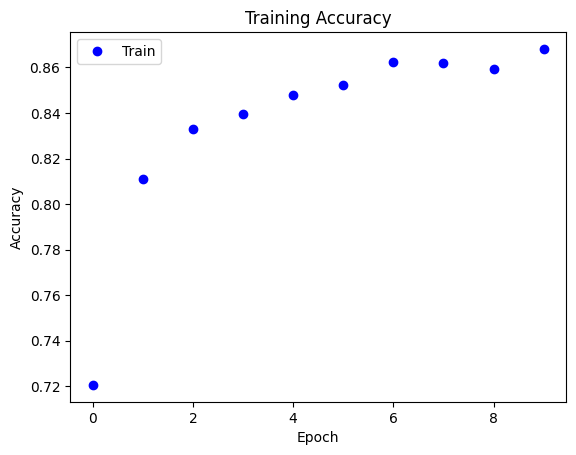

In [41]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc)+1)

# Mostrar las curvas de precisión del entrenamiento
plt.plot(epochs, acc, 'bo', label='Train Accuracy')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

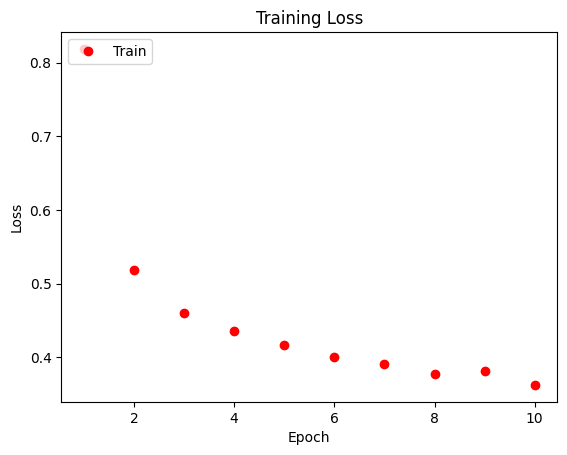

In [42]:
# Mostrar las curvas de pérdida del entrenamiento
plt.plot(epochs, loss, 'ro', label='Train Loss')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

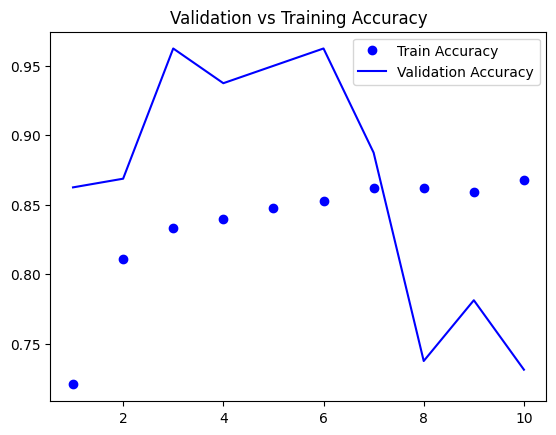

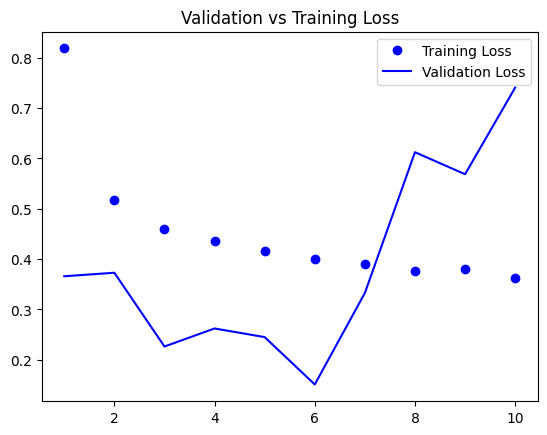

In [44]:
# Evaluación del modelo
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(epochs,acc,'bo',label='Train Accuracy')
plt.plot(epochs,val_acc, 'b', label='Validation Accuracy')
plt.title('Validation vs Training Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='Training Loss')
plt.plot(epochs,val_loss, 'b', label = 'Validation Loss')
plt.title('Validation vs Training Loss')
plt.legend()

plt.show()

In [37]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')
model.save('scenery_identificator.keras')

65/65 ━━━━━━━━━━━━━━━━━━━━ 51s 789ms/step - accuracy: 0.8259 - loss: 0.4756
Test Accuracy: 0.8402137160301208
Test Loss: 0.4426400065422058
